In [16]:
import numpy as np
import pandas as pd
import os
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, Dropout


IMAGE_SIZE = [224, 224]

vgg_19 = VGG19(input_shape=IMAGE_SIZE + [3], weights="imagenet", include_top=False)
for layer in vgg_19.layers:
    layer.trainable = False

x = Flatten()(vgg_19.output)

x = Dense(512, activation="relu")(x)

x = Dense(216, activation="relu")(x)

x = Dropout(0.2)(x)

prediction = Dense(2, activation="softmax")(x)

model = Model(inputs=vgg_19.input, outputs=prediction)
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)

train_data = ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                rotation_range=40,
                                horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_data_gen = train_data.flow_from_directory(directory="train/",
                                                target_size=(224, 224),
                                                class_mode="categorical",
                                                batch_size=64)

test_data_gen = test_data.flow_from_directory(directory="test/",
                                              target_size=(224, 224),
                                              class_mode="categorical",
                                              batch_size=64)

history = model.fit(
    train_data_gen,
    validation_data=test_data_gen,
    epochs=20,
    callbacks=[learning_rate_reduction]
)


Found 970 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 1/20
 1/16 [>.............................] - ETA: 1:49 - loss: 0.7610 - accuracy: 0.5156

c:\Users\batuy\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 111s 7s/step - loss: 2.3189 - accuracy: 0.5588 - val_loss: 0.6219 - val_accuracy: 0.6954 - lr: 0.0010
Epoch 2/20
16/16 [==============================] - 109s 7s/step - loss: 0.9130 - accuracy: 0.5990 - val_loss: 0.5111 - val_accuracy: 0.7513 - lr: 0.0010
Epoch 3/20
16/16 [==============================] - 111s 7s/step - loss: 0.6146 - accuracy: 0.6753 - val_loss: 0.4660 - val_accuracy: 0.7843 - lr: 0.0010
Epoch 4/20
16/16 [==============================] - 105s 7s/step - loss: 0.5713 - accuracy: 0.7041 - val_loss: 0.4400 - val_accuracy: 0.7919 - lr: 0.0010
Epoch 5/20
16/16 [==============================] - 105s 7s/step - loss: 0.5537 - accuracy: 0.7144 - val_loss: 0.4287 - val_accuracy: 0.8147 - lr: 0.0010
Epoch 6/20
16/16 [==============================] - 106s 7s/step - loss: 0.5236 - accuracy: 0.7309 - val_loss: 0.4246 - val_accuracy: 0.7995 - lr: 0.0010
Epoch 7/20
16/16 [==============================] - 110s 7s/step - loss: 0.5007 - accur

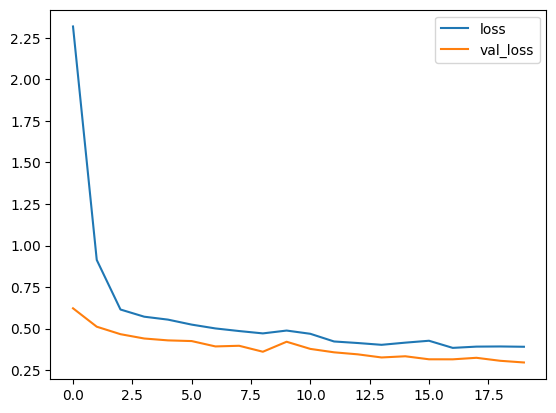

In [20]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()


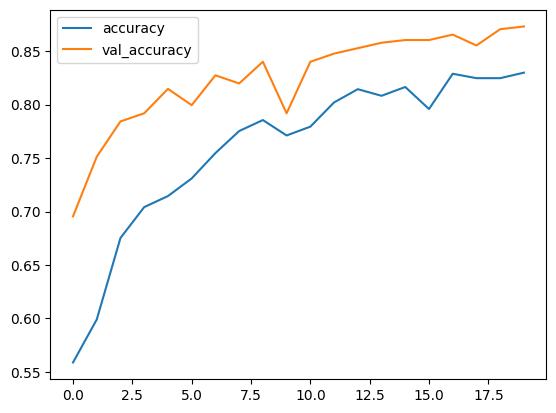

In [21]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()